<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Quantum Computing and Quantum Machine Learning, Project 1 -->

## Part e)

Compute now the eigenvalues of this system using the VQE method and
set up the circuits needed to find the lowest state. Compare these
results with those from the previous part. Feel free again to either
use your own code for the circuit and your VQE code or use the
functionality of [Qiskit](https://qiskit.org/), or both.

<span style="color:red">Solution:</span>

Case for two qubits. Here we follow with the main idea about the VQE

Rotational gates for different parameters have the following forms:

$$R_{y}(\phi_{1}) = \cos(\frac{\phi_{1}}{2})I - i\sin(\frac{\phi_{1}}{2})\sigma_{y} =
\begin{bmatrix}
\cos(\frac{\phi_{1}}{2}) & -\sin(\frac{\phi_{1}}{2}) \\
\sin(\frac{\phi_{1}}{2}) & \cos(\frac{\phi_{1}}{2}) 
\end{bmatrix}$$

$$R_{x}(\theta_{1}) =  \cos(\frac{\theta_{1}}{2})I - i\sin(\frac{\theta_{1}}{2})\sigma_{x} =
\begin{bmatrix}
\cos(\frac{\theta_{1}}{2}) & -i\sin(\frac{\theta_{1}}{2}) \\
-i\sin(\frac{\theta_{1}}{2}) & \cos(\frac{\theta_{1}}{2}) 
\end{bmatrix}$$

$$R_{y}(\phi_{2}) = \cos(\frac{\phi_{2}}{2})I - i\sin(\frac{\phi_{2}}{2})\sigma_{y} =
\begin{bmatrix}
\cos(\frac{\phi_{2}}{2}) & -\sin(\frac{\phi_{2}}{2}) \\
\sin(\frac{\phi_{2}}{2}) & \cos(\frac{\phi_{2}}{2}) 
\end{bmatrix}$$

$$R_{x}(\theta_{2}) =  \cos(\frac{\theta_{2}}{2})I - i\sin(\frac{\theta_{2}}{2})\sigma_{x} =
\begin{bmatrix}
\cos(\frac{\theta_{2}}{2}) & -i\sin(\frac{\theta_{2}}{2}) \\
-i\sin(\frac{\theta_{2}}{2}) & \cos(\frac{\theta_{2}}{2}) 
\end{bmatrix}$$

Now we rewrite the hamiltonian via Pauli matrices. 

$$\begin{equation}
H = \alpha \mathbb{1} \otimes \mathbb{1} + \beta \mathbb{1}\otimes \sigma_{z} + \gamma \sigma_{z}\otimes \mathbb{1} + (\delta + H_{z})\sigma_{z}\otimes \sigma_{z} + H_{x}\sigma_{x}\otimes \sigma_{x} 
\end{equation}
$$

Quantum Circuit:


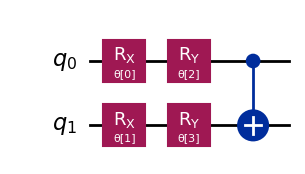

Energy: -1.328427096363577
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Optimal parameters θ[0,1,2,3]: [ 3.14153964  3.14168009 -3.92709586 -6.28314937]


In [1]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler, Estimator

E00 = 0.0
E10 = 2.5
E01 = 6.5
E11 = 7.0
alpha = (E00 + E10 + E01 + E11)/4
betha = (E00 + E10 - E01 - E11)/4
gamma = (E00 - E10 + E01 - E11)/4
delta = (E00 - E10 - E01 + E11)/4
Hx = 2.0
Hz = 3.0

ansatz = TwoLocal(2, ['rx','ry','cx'], 'cx','linear', reps=0)
op = SparsePauliOp.from_list([('II',alpha), ('IZ',betha), ('ZI',gamma), ('ZZ',delta + Hz), ('XX',Hx)])

estimator = Estimator() 
optimizer = COBYLA() 
 
vqe = VQE(estimator, ansatz, optimizer) 
result = vqe.compute_minimum_eigenvalue(operator=op) 
eigenvalue = result.eigenvalue

print("Quantum Circuit:")
display(ansatz.decompose().draw('mpl'))
print("Energy:",eigenvalue)
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("Optimal parameters θ[0,1,2,3]:",result.optimal_point)

Again we can set up the circuit to perform measurements

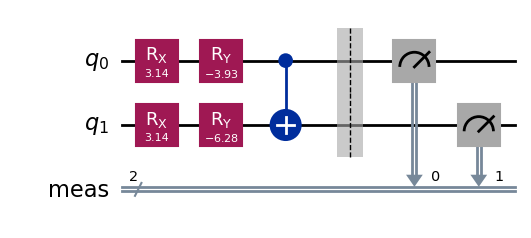

In [2]:
from qiskit import QuantumCircuit
import qiskit_aer
from qiskit.visualization import plot_histogram
import numpy as np

backend = qiskit_aer.Aer.get_backend('qasm_simulator')

qr = QuantumCircuit(2)
qr.rx(result.optimal_point[0],0)        # rotational x for the first qubit
qr.ry(result.optimal_point[2],0)        # rotational y for the first qubit
qr.rx(result.optimal_point[1],1)        # rotational x for the second qubit
qr.ry(result.optimal_point[3],1)        # rotational y for the second qubit
qr.cx(0, 1) 

qr.measure_all()
qr.draw(output="mpl")

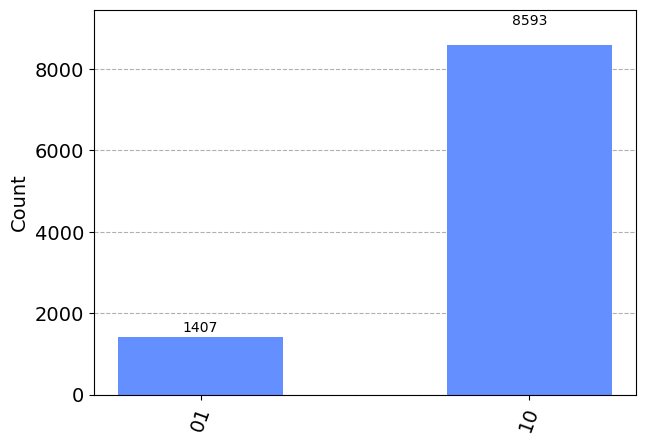

In [3]:
job = backend.run(qr, shots=10000)
result = job.result()

counts = result.get_counts(qr)
plot_histogram(counts)

We also have created other code using qiskit but define the wave function (ansatz) and the explicit calculation for the expectation value. You can check the created code in **[https://github.com/JosephPVera/UIO/blob/main/Quantum%20Computing/Project%201/Report%20codes/%20Project%201%20-%20Report%20codes.ipynb](https://github.com/JosephPVera/UIO/blob/main/Quantum%20Computing/Project%201/Report%20codes/%20Project%201%20-%20Report%20codes.ipynb)**